In [32]:
#import das bibliotecas
import re                       # Suporte para reconhecimento de expressões regulares.
import numpy as np              # Suporte para arrays e operações matemáticas.
import pandas as pd             # Suporte para manipulação de DataFrames.
import skfuzzy as fuzzy         # Suporte para operação com Lógica Fuzzy.
from tabulate import tabulate   # Suporte para manipulação de Tabelas.
import skfuzzy.control as ctrl  # Suporte para manipulação de Sistemas Fuzzy.
import matplotlib.pyplot as plt # Suporte para visualização de gráficos.
import tkinter as tk            # Suporte para criação de interface com o usuário

C:\Users\jonat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


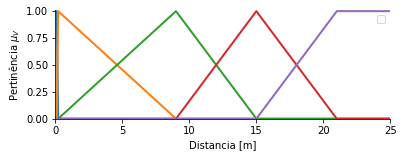

In [33]:
# Definição das variáveis fuzzy do Erro
Erro = ctrl.Antecedent(universe = np.arange(0, 25.01, 0.01), label = 'Erro')

Erro['ZE'] = fuzzy.trapmf(Erro.universe, [0, 0, 0.1, 0.2])
Erro['R1'] = fuzzy.trimf(Erro.universe, [0.1, 0.2, 9])
Erro['R2'] = fuzzy.trimf(Erro.universe, [0.2, 9, 15])
Erro['R3'] = fuzzy.trimf(Erro.universe, [9, 15, 21])
Erro['R4'] = fuzzy.trapmf(Erro.universe, [15, 21, 25, 25])

# Ajustando o gráfico
Erro.view() # Método para visualização da função de pertinencia
[plt.gca().lines[i].set_linewidth(2) for i in range(len(plt.gca().lines))]

fig = plt.gcf(); axes = fig.gca(); fig.set_size_inches(6, 2)
axes.set_xlabel(xlabel='Distancia [m]'); axes.set_xlim([0, 25])
axes.set_ylabel(ylabel='Pertinência $\mu_{V}$')
plt.legend('');

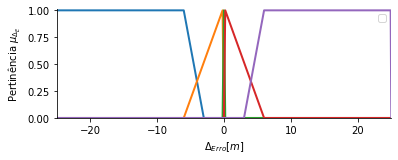

In [34]:
# Definindo as variaveis Fuzzy do deltaErro
deltaErro = ctrl.Antecedent(np.arange(-25, 25.1, 0.1), label = 'deltaErro')

deltaErro['MN'] = fuzzy.trapmf(deltaErro.universe, [-25, -25, -6, -3])
deltaErro['PN'] = fuzzy.trimf(deltaErro.universe, [-6, -0.2, 0])
deltaErro['ZE'] = fuzzy.trimf(deltaErro.universe, [-0.2, 0, 0.2])
deltaErro['PP'] = fuzzy.trimf(deltaErro.universe, [0, 0.2, 6])
deltaErro['MP'] = fuzzy.trapmf(deltaErro.universe, [3, 6, 25, 25])

# Ajustando o gráfico
deltaErro.view() # Método para visualização da função de pertinencia
[plt.gca().lines[i].set_linewidth(2) for i in range(len(plt.gca().lines))]

fig = plt.gcf(); axes = fig.gca(); fig.set_size_inches(6, 2)
axes.set_xlabel(xlabel='$\Delta_{Erro} [m]$'); axes.set_xlim([-25,25])
axes.set_ylabel(ylabel='Pertinência $\mu_{\Delta_{E}}$')
plt.legend('');

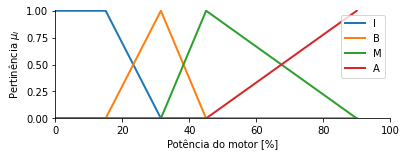

In [35]:
# Definindo as variaveis fuzzy do PMotor
PMotor = ctrl.Consequent(np.arange(0, 90.5, 0.5), label = 'PMotor')
PMotor['I'] = fuzzy.trapmf(PMotor.universe, [0, 0, 15, 31.5])
PMotor['B'] = fuzzy.trimf(PMotor.universe, [15, 31.5, 45])
PMotor['M'] = fuzzy.trimf(PMotor.universe, [31.5, 45, 90])
PMotor['A'] = fuzzy.trimf(PMotor.universe, [45, 90, 90])


PMotor.view()
[plt.gca().lines[i].set_linewidth(2) for i in range(len(plt.gca().lines))]

fig = plt.gcf(); axes = fig.gca(); fig.set_size_inches(6, 2)
axes.set_xlabel(xlabel='Potência do motor [%]'); axes.set_xlim([0, 100])
axes.set_ylabel(ylabel='Pertinência $\mu_{I}$')
plt.legend(loc='upper right');

In [36]:
# Base de Regras
R1 = ctrl.Rule(Erro['ZE'] & deltaErro['MN'], PMotor['I'])
R2 = ctrl.Rule(Erro['ZE'] & deltaErro['PN'], PMotor['I'])
R3 = ctrl.Rule(Erro['ZE'] & deltaErro['ZE'], PMotor['I'])
R4 = ctrl.Rule(Erro['ZE'] & deltaErro['PP'], PMotor['I'])
R5 = ctrl.Rule(Erro['ZE'] & deltaErro['MP'], PMotor['I'])

R6 = ctrl.Rule(Erro['R1'] & deltaErro['MN'], PMotor['B'])
R7 = ctrl.Rule(Erro['R1'] & deltaErro['PN'], PMotor['B'])
R8 = ctrl.Rule(Erro['R1'] & deltaErro['ZE'], PMotor['I'])
R9 = ctrl.Rule(Erro['R1'] & deltaErro['PP'], PMotor['B'])
R10 = ctrl.Rule(Erro['R1'] & deltaErro['MP'], PMotor['B'])

R11 = ctrl.Rule(Erro['R2'] & deltaErro['MN'], PMotor['M'])
R12 = ctrl.Rule(Erro['R2'] & deltaErro['PN'], PMotor['M'])
R13 = ctrl.Rule(Erro['R2'] & deltaErro['ZE'], PMotor['I'])
R14 = ctrl.Rule(Erro['R2'] & deltaErro['PP'], PMotor['M'])
R15 = ctrl.Rule(Erro['R2'] & deltaErro['MP'], PMotor['M'])

R16 = ctrl.Rule(Erro['R3'] & deltaErro['MN'], PMotor['M'])
R17 = ctrl.Rule(Erro['R3'] & deltaErro['PN'], PMotor['M'])
R18 = ctrl.Rule(Erro['R3'] & deltaErro['ZE'], PMotor['I'])
R19 = ctrl.Rule(Erro['R3'] & deltaErro['PP'], PMotor['M'])
R20 = ctrl.Rule(Erro['R3'] & deltaErro['MP'], PMotor['M'])

R21 = ctrl.Rule(Erro['R4'] & deltaErro['MN'], PMotor['A'])
R22 = ctrl.Rule(Erro['R4'] & deltaErro['PN'], PMotor['B'])
R23 = ctrl.Rule(Erro['R4'] & deltaErro['ZE'], PMotor['I'])
R24 = ctrl.Rule(Erro['R4'] & deltaErro['PP'], PMotor['B'])
R25 = ctrl.Rule(Erro['R4'] & deltaErro['MP'], PMotor['A'])

In [37]:
# Gerando o controlador do sitema
qtdRegras = len(Erro.terms)*len(deltaErro.terms)
BaseRegras = [globals()[f'R{regra}'] for regra in range(1, qtdRegras + 1)]
ControleVelocidade = ctrl.ControlSystemSimulation(ctrl.ControlSystem(BaseRegras))

In [38]:
# Gerando a tabela de pertinencias
vermelho, verde, amarelo, azul, magenta, ciano = ['\033[91m', '\033[92m', '\033[93m', '\033[94m', '\033[95m', '\033[96m']

tabela = []
for erro in Erro.terms:
  for deltaerro in deltaErro.terms:
    for regra in BaseRegras:
      antecedente = str(regra).split('IF ')[1].split(' THEN')[0].replace('AND ', '')
      consequente = str(regra).split('IF ')[1].split(' THEN')[1].split('AND ')[0]

      classificacoes = re.findall(r'\[(.*?)\]', (antecedente + consequente))
      if erro == classificacoes[0] and deltaerro == classificacoes[1]:
        tabela.append([classificacoes[0], classificacoes[1], classificacoes[2]])
        break

df = pd.DataFrame(tabela, columns=[Erro.label, 'E', PMotor.label])
pivotTable = pd.DataFrame(df.pivot(index='E', columns=Erro.label, values=PMotor.label).reindex(index=deltaErro.terms, columns=Erro.terms))
pivotTable.index.name = f'{magenta}{pivotTable.index.name}\033[0m'
print(tabulate(pivotTable, headers='keys', tablefmt='fancy_grid', stralign='center', showindex='always'))

╒═════╤══════╤══════╤══════╤══════╤══════╕
│  E  │  ZE  │  R1  │  R2  │  R3  │  R4  │
╞═════╪══════╪══════╪══════╪══════╪══════╡
│ MN  │  I   │  B   │  M   │  M   │  A   │
├─────┼──────┼──────┼──────┼──────┼──────┤
│ PN  │  I   │  B   │  M   │  M   │  B   │
├─────┼──────┼──────┼──────┼──────┼──────┤
│ ZE  │  I   │  I   │  I   │  I   │  I   │
├─────┼──────┼──────┼──────┼──────┼──────┤
│ PP  │  I   │  B   │  M   │  M   │  B   │
├─────┼──────┼──────┼──────┼──────┼──────┤
│ MP  │  I   │  B   │  M   │  M   │  A   │
╘═════╧══════╧══════╧══════╧══════╧══════╛


In [39]:
# Ajuste para a UI
andares = {
    "Térreo": 4,
    "1º Andar": 8,
    "2º Andar": 11,
    "3º Andar": 14,
    "4º Andar": 17,
    "5º Andar": 20,
    "6º Andar": 23,
    "7º Andar": 26,
    "8º Andar": 29
}

# Variáveis globais para controle de posição atual
andarAtual = 4
posicaoAtual = andarAtual
nome_andar_atual = [k for k, v in andares.items() if v == andarAtual][0]

# Função de simulação com base no andar selecionado
def iniciar_simulacao(andar_deslocado, andar_nome):
    global andarAtual, posicaoAtual, nome_andar_atual
    
    # Chamando a função de simulação com os valores obtidos
    simulacao(andar_deslocado, andarAtual)
    
    # Atualiza a posição inicial para o último andar deslocado
    andarAtual = andar_deslocado
    nome_andar_atual = andar_nome
    label_atual.config(text=f"Andar Atual: {andar_nome}")

In [40]:
# Função para simular o deslocamento do elevador
def simulacao (andarDeslocado, andarAtual):
    # Configuração inicial
    global posicaoAtual
    
    andarDeslocado = andarDeslocado  # Altura desejada do elevador
    andarAtual = andarAtual  # Posição inicial do elevador
    erro_atual = 0.0

    posicao, posicaoAtual = [[andarAtual], andarAtual] # Array para guardar os valores de posicao
    erroAltura = andarDeslocado - posicaoAtual

    if andarDeslocado != andarAtual:
        for t in np.arange(0.1, 3.1, 0.1):    
            P_Motor = t * 0.315 / 3
            posicaoAtual = abs(posicaoAtual*(1 if erroAltura > 0 else -1) + P_Motor * 0.00951 * (1 if erroAltura > 0 else -1))
            if t == round(t, 1):  # Ajustando a condição para verificar números de ponto flutuante corretamente
                posicao = np.append(posicao, posicaoAtual)
                #print(f"Tempo: {t}s, Andar atual: {posicaoAtual:.2f}, Erro atual: {erro_atual:.2f}, Potência do motor: {P_Motor * 100:.2f}%") 
            posicao, posicaoAtual = [[andarAtual], andarAtual] # Array para guardar os valores de posicao   

        erro_anterior = andarDeslocado - posicaoAtual
        
        for tempo in np.arange(3, 150, 1):

            # Calcule o Erro Atual e faça o input no sitema de controle
            erroAltura = andarDeslocado - posicaoAtual
            erro_atual = abs(erroAltura)
            ControleVelocidade.input['Erro'] = erro_atual

            # Calcule a variação do Erro em comparação com o Anterior e faça um input no sistema de controle
            deltaErro_atual = erro_anterior - erro_atual    
            ControleVelocidade.input['deltaErro'] = deltaErro_atual

            # Computando a saída do controlador fuzzy
            ControleVelocidade.compute()
            P_Motor = ControleVelocidade.output['PMotor']
            posicaoAtual = abs(posicaoAtual * 0.996 * (1 if erroAltura > 0 else -1) + P_Motor * 0.00951)

            # Atualização do erro anterior
            posicao = np.append(posicao, posicaoAtual)
            erro_anterior = erro_atual
            # Publicação dos resultados
            #print(f"Tempo: {tempo}s, Andar atual: {posicaoAtual:.2f}, Erro atual: {erro_atual:.2f}, Potência do motor: {P_Motor:.2f}%")
    else:
        posicao = np.append(posicao, posicaoAtual)
            
    andarAtual = andarDeslocado

    # Plotando a posição    
    plt.axhline(y=andarDeslocado + 0.1, color='g', linestyle='--')
    plt.axhline(y=andarDeslocado - 0.1, color='g', linestyle='--')
    plt.axhline(y=andarDeslocado, color='r', linestyle='--', label = 'Set Point')
    plt.plot(np.arange(1, len(posicao) + 1), posicao, label = 'Posição')
    plt.xlabel('Tempo [s]')
    plt.ylabel('Posição do Elevador [m]')
    plt.title('Controle Fuzzy do Elevador')
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.show()


In [41]:

# Criando a interface gráfica
root = tk.Tk()
root.title("Simulação de Controle Fuzzy de Elevador")

# Frame para o display do andar atual
frame_display = tk.Frame(root)
frame_display.pack(pady=10)

label_atual = tk.Label(frame_display, text=f"Andar Atual: {nome_andar_atual}", font=("Helvetica", 16))
label_atual.pack()

# Frame para os botões dos andares
frame_andares = tk.Frame(root)
frame_andares.pack(padx=20, pady=20)

# Criando botões para cada andar em uma grade
row, col = 0, 0
for andar, altura in andares.items():
    btn_andar = tk.Button(frame_andares, text=andar, width=10, height=2, 
                          command=lambda a=altura, n=andar: iniciar_simulacao(a, n))
    btn_andar.grid(row=row, column=col, padx=10, pady=5)
    col += 1
    if col > 2:
        col = 0
        row += 1

# Execução da interface
root.mainloop()